# Project 554– Recommendation system

# Objective
Build a book recommendation system using the provided datasets "Users", "Books", and "Ratings". The system should generate features from the data and recommend books to users. The final model should be deployed using RShiny, Flask, or Streamlit.

## Data loading

Load the three datasets (Users, Books, and Ratings) into pandas DataFrames.

In [1]:
import pandas as pd

users_df = pd.read_csv('Users.csv')
books_df = pd.read_csv('Books.csv')
ratings_df = pd.read_csv('Ratings.csv')

print("Users DataFrame head:")
display(users_df.head())
print("\nBooks DataFrame head:")
display(books_df.head())
print("\nRatings DataFrame head:")
display(ratings_df.head())

/tmp/ipython-input-1-3283154390.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv')


Users DataFrame head:


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN



Books DataFrame head:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...



Ratings DataFrame head:


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Data exploration and preprocessing


Exploring each dataset to understand its structure, identify missing values, and analyze data types. Handle missing values in the Users dataset (location and age) and analyze the distribution of ratings and decide how to handle explicit (1-10) and implicit (0) ratings, this will let us take the potential data cleaning steps like removing duplicate entries or handling inconsistent data.



Lets print the concise summary of each dataframe and check for missing values in `users_df`, and examine the unique values and their counts in the 'Age' column of `users_df`.



In [2]:
print("Users DataFrame summary:")
users_df.info()

print("\nBooks DataFrame summary:")
books_df.info()

print("\nRatings DataFrame summary:")
ratings_df.info()

print("\nMissing values in Users DataFrame:")
display(users_df.isnull().sum())

print("\nUnique values and counts in 'Age' column of Users DataFrame:")
display(users_df['Age'].value_counts(dropna=False).sort_index())

Users DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB

Books DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L 

,0
User-ID,0
Location,0
Age,110762



Unique values and counts in 'Age' column of Users DataFrame:


,count
Age,
0.0,416
1.0,288
2.0,105
3.0,45
4.0,28
...,...
231.0,1
237.0,1
239.0,1



Analyze the distribution of book ratings, handle age outliers , handle missing age values in `users_df` by replacing values above 90 and below 5 with NaN and then imputing NaN with the median, and handle implicit ratings in `ratings_df` by removing them.



In [3]:
import numpy as np

print("\nValue counts of 'Book-Rating' column in Ratings DataFrame:")
display(ratings_df['Book-Rating'].value_counts().sort_index())

# Handle missing age values in users_df
users_df['Age'] = users_df['Age'].apply(lambda x: np.nan if x > 90 or x < 5 else x)


users_df['Age'] = users_df['Age'].fillna(users_df['Age'].median())


print("\nMissing values in Users DataFrame after handling Age:")
display(users_df.isnull().sum())

# Handle implicit ratings in ratings_df
ratings_df = ratings_df[ratings_df['Book-Rating'] != 0]
print("\nRatings DataFrame after removing implicit ratings:")
display(ratings_df.head())


Value counts of 'Book-Rating' column in Ratings DataFrame:


,count
Book-Rating,
0,716109
1,1770
2,2759
3,5996
4,8904
5,50974
6,36924
7,76457
8,103736



Missing values in Users DataFrame after handling Age:


,0
User-ID,0
Location,0
Age,0



Ratings DataFrame after removing implicit ratings:


,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


## Feature engineering


Now , lets explore potential features in `books_df` and `users_df` that can be generated from the datasets. Something like, user demographics, book genres, publication years, author popularity, etc. Decide on the features to be used for the recommendation system based on the chosen model approach.


In [4]:
print("Exploring features in books_df:")
print(books_df[['Year-Of-Publication', 'Publisher', 'Book-Author']].nunique()) #To Understand the diversity of the data (e.g., how many authors or publishers).

print("\nExploring features in users_df:")
print(users_df[['Location', 'Age']].nunique()) #Gives insights to understand how many different locations and ages are present in the user data.

# Example of extracting features from Location
users_df['Country'] = users_df['Location'].apply(lambda x: x.split(',')[-1].strip()) #extract only country from the location.
print("\nUnique countries in users_df:")
print(users_df['Country'].nunique())

# Example of categorizing Age
users_df['Age_Group'] = pd.cut(users_df['Age'], bins=[0, 18, 30, 50, 70, 100], labels=['0-17', '18-29', '30-49', '50-69', '70+']) #age brackets help understand the model generalize the age(usually such age groups have same interest,etc)
print("\nAge group distribution:")
print(users_df['Age_Group'].value_counts())


Exploring features in books_df:
Year-Of-Publication       202
Publisher               16807
Book-Author            102022
dtype: int64

Exploring features in users_df:
Location    57339
Age            86
dtype: int64

Unique countries in users_df:
709

Age group distribution:
Age_Group
30-49    178225
18-29     60267
50-69     23702
0-17      15131
70+        1533
Name: count, dtype: int64


## Missing Values

In [5]:
print("Missing values in books_df:")
print(books_df.isnull().sum())


Missing values in books_df:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


## Remove Books with Missing Critical Info

In [6]:
books_df.dropna(subset=['ISBN', 'Book-Title', 'Book-Author'], inplace=True)


In [7]:
print("Missing values after dropping rows with missing ISBN, Title, or Author:")
print(books_df[['ISBN', 'Book-Title', 'Book-Author']].isnull().sum())


Missing values after dropping rows with missing ISBN, Title, or Author:
ISBN           0
Book-Title     0
Book-Author    0
dtype: int64


In [8]:
print("Missing values in books_df after dropping rows:")
print(books_df.isnull().sum())


Missing values in books_df after dropping rows:
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [9]:
#Dropping rows with missing Publisher values

books_df.dropna(subset=['Publisher'], inplace=True)


In [10]:
# Filling with a placeholder image URL
placeholder_url = 'https://via.placeholder.com/150'
books_df['Image-URL-L'] = books_df['Image-URL-L'].fillna(placeholder_url)




In [11]:
print("Final missing value check:")
print(books_df.isnull().sum())


Final missing value check:
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


In [12]:
#  Merge ratings with books on ISBN
ratings_books_df = ratings_df.merge(books_df, on='ISBN')

#  Merge with users on User-ID
final_df = ratings_books_df.merge(users_df, on='User-ID')


In [13]:
print("Final merged dataset shape:", final_df.shape)
print("Missing values after merging:")
print(final_df.isnull().sum())


Final merged dataset shape: (383838, 14)
Missing values after merging:
User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
Country                0
Age_Group              0
dtype: int64


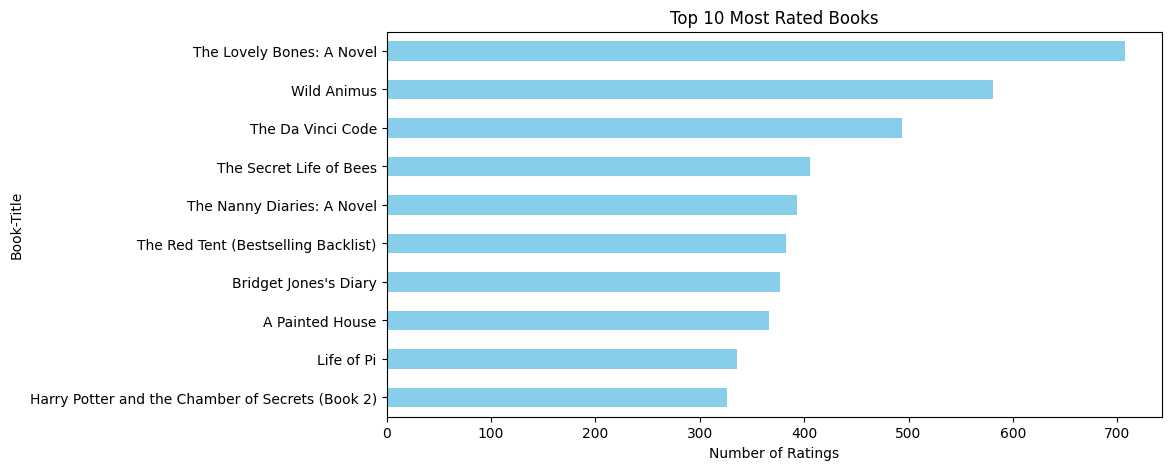

In [14]:
#Most Rated Books

import matplotlib.pyplot as plt

top_books = final_df['Book-Title'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_books.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.gca().invert_yaxis()
plt.show()



### Insights:

- "The Lovely Bones: A Novel" is the most rated book, followed by "Wild Animus" and "The Da Vinci Code".

- These books are either very popular, frequently promoted, or included in many users' libraries.

- This confirms a popularity bias, which is common in recommendation datasets.

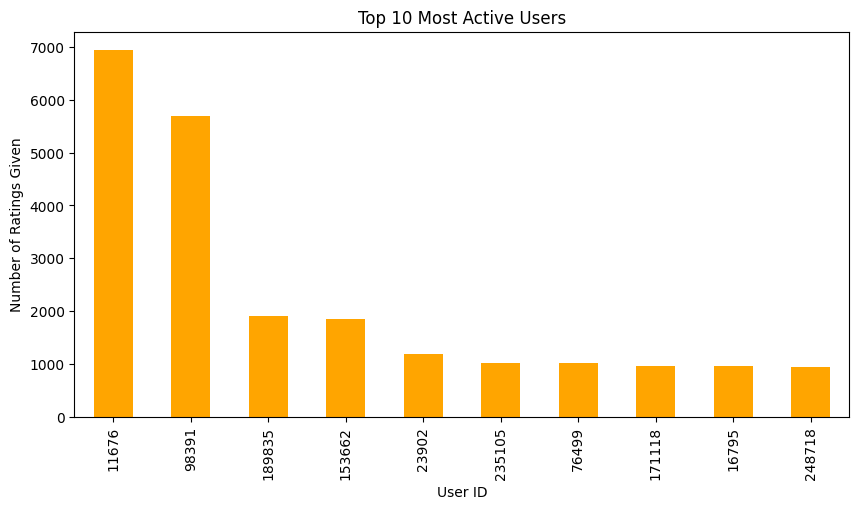

In [15]:
#Most Active Users
top_users = final_df['User-ID'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_users.plot(kind='bar', color='orange')
plt.title('Top 10 Most Active Users')
plt.ylabel('Number of Ratings Given')
plt.xlabel('User ID')
plt.show()


### Insights:

- One user (11676) has rated nearly 7,000 books, which is far above others this is likely an outlier.

- Other users also show high activity, suggesting a long tail of frequent raters.

/tmp/ipython-input-16-3949112670.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=final_df, palette='viridis')


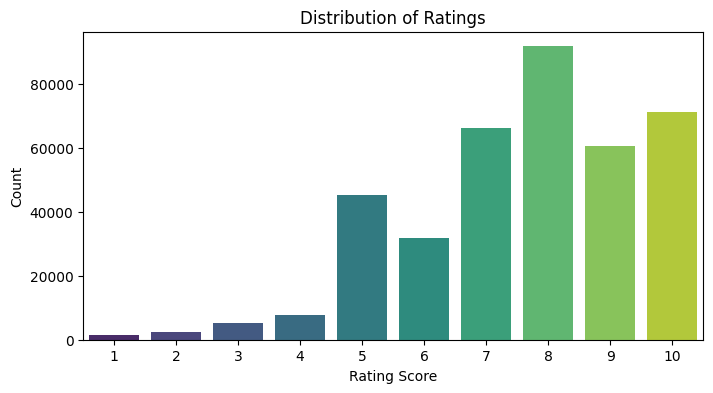

In [16]:
#Ratings Distribution
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(x='Book-Rating', data=final_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()


###Insights:

- Most users give high ratings: 8, 9, and 10 dominate.

- Very few ratings are 1–4.

- This indicates a positive skew, meaning users mostly give favorable reviews.

/tmp/ipython-input-17-1615708194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=final_df, order=['0-17', '18-29', '30-49', '50-69', '70+'], palette='Set2')


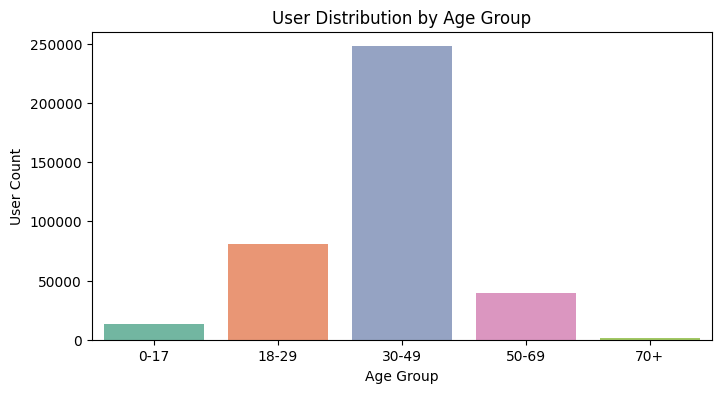

In [17]:
#Users by Age Group
plt.figure(figsize=(8,4))
sns.countplot(x='Age_Group', data=final_df, order=['0-17', '18-29', '30-49', '50-69', '70+'], palette='Set2')
plt.title('User Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('User Count')
plt.show()


### Insights:

- Most users fall in the 30–49 age bracket, followed by 18–29.

- Very few users in the 70+ and 0–17 groups.

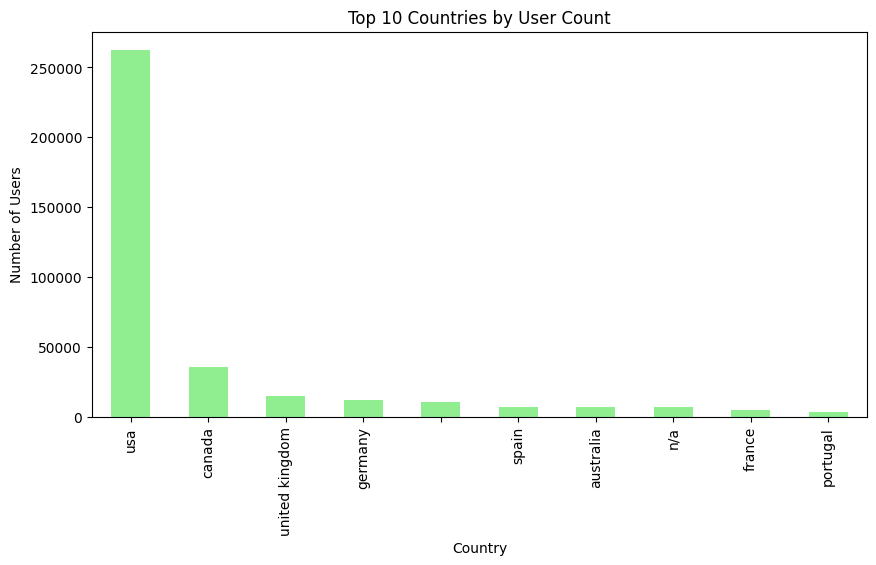

In [18]:
#Country-wise User Count
top_countries = final_df['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries by User Count')
plt.ylabel('Number of Users')
plt.xlabel('Country')
plt.show()


### Insights:

- USA dominates with a huge margin.

- Other countries (Canada, UK, Germany, etc.) have much fewer users.

- There’s a long tail of less-represented countries.

In [21]:
# Identifying and Handling Extremely Active Users (Outliers) by Capping the extremely Active Users

In [22]:
# Optional: Keep only users with less than 1000 ratings
active_users = user_rating_counts[user_rating_counts < 1000].index
filtered_df = final_df[final_df['User-ID'].isin(active_users)]

print("Filtered dataset shape:", filtered_df.shape)


Filtered dataset shape: (364250, 14)


- Removed potential outliers who could distort collaborative filtering results , leading us to more balanced dataset where user activity is closer to normal.

- The reduction (~5%) is small enough to retain most of your data — so we are not losing significant volume.

Task 1: Popularity-Based Recommendation System

Goal: Recommend books based on their popularity (average rating and number of ratings).

In [3]:
import pandas as pd

# Load data
books = pd.read_excel("Books.xlsx")
ratings = pd.read_csv("Ratings.csv", encoding='latin1')  # <- Fix here
users = pd.read_csv("Users.csv", encoding='latin1')      # Optional fix

# Check data
print(books.head())
print(ratings.head())
print(users.head())

        ISBN                                         Book-Title  \
0  195153448                                Classical Mythology   
1    2005018                                       Clara Callan   
2   60973129                               Decision in Normandy   
3  374157065  Flu: The Story of the Great Influenza Pandemic...   
4  393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images

Step 1: Popularity-Based Recommendation System

This method recommends books that are most rated or have the highest average ratings.

In [6]:
print(book_ratings.dtypes)

User-ID                 int64
ISBN                   object
Book-Rating             int64
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [7]:
# Use only relevant columns for popularity aggregation
df = book_ratings[['Book-Title', 'Book-Rating']].copy()

# Ensure both columns are of correct types
df['Book-Title'] = df['Book-Title'].astype(str)
df['Book-Rating'] = pd.to_numeric(df['Book-Rating'], errors='coerce')

# Group by Book-Title
popularity_df = df.groupby('Book-Title').agg({'Book-Rating': ['count', 'mean']})
popularity_df.columns = ['num_ratings', 'avg_rating']

# Filter and sort
popular_books = popularity_df[popularity_df['num_ratings'] >= 50]
top_10 = popular_books.sort_values(by='avg_rating', ascending=False).head(10)

print(top_10)

                                                    num_ratings  avg_rating
Book-Title                                                                 
The Cat in the Hat                                           53    5.754717
Harry Potter and the Order of the Phoenix (Book 5)          335    5.585075
Interpreter of Maladies                                     134    4.910448
Sister of My Heart                                           63    4.904762
Harry Potter and the Sorcerer's Stone (Harry Po...          575    4.895652
Speak                                                        70    4.785714
Harry Potter and the Sorcerer's Stone (Book 1)              110    4.781818
Balzac and the Little Chinese Seamstress                     75    4.720000
Desecration: Antichrist Takes the Throne (Left ...           53    4.679245
The Time Traveler's Wife                                     51    4.588235


User-Based Collaborative Filtering
This model recommends books to a user by finding similar users based on rating behavior.

📌 Logic Recap:
Create a user-book rating matrix.

Fill missing values with 0 (as unrated).

Use cosine similarity to find users with similar preferences.

Recommend books that similar users liked but the target user hasn’t rated yet.

In [9]:
#Select only required columns first
user_book_df = book_ratings[['User-ID', 'Book-Title', 'Book-Rating']].copy()

#Force correct types
user_book_df['Book-Title'] = user_book_df['Book-Title'].astype(str)
user_book_df['Book-Rating'] = pd.to_numeric(user_book_df['Book-Rating'], errors='coerce')

#Create the pivot table
user_book_matrix = user_book_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')

#Fill missing ratings with 0
user_book_matrix.fillna(0, inplace=True)

print("User-book matrix created successfully!")

User-book matrix created successfully!


In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Use only the required columns
user_book_df = book_ratings[['User-ID', 'Book-Title', 'Book-Rating']].copy()

# Step 2: Ensure correct types
user_book_df['Book-Title'] = user_book_df['Book-Title'].astype(str)
user_book_df['Book-Rating'] = pd.to_numeric(user_book_df['Book-Rating'], errors='coerce')

# Step 3: Create pivot table
user_book_matrix = user_book_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
user_book_matrix.fillna(0, inplace=True)

# Step 4: Calculate cosine similarity
user_similarity = cosine_similarity(user_book_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_book_matrix.index, columns=user_book_matrix.index)

# Step 5: Function to get top similar users
def get_similar_users(user_id, top_n=5):
    if user_id in user_similarity_df:
        return user_similarity_df[user_id].sort_values(ascending=False).head(top_n + 1)[1:]
    else:
        return "User not found."

# Step 6: Recommend books from similar users
def recommend_books(user_id, top_n=5):
    if user_id not in user_book_matrix.index:
        return "User not found."

    similar_users = get_similar_users(user_id, top_n=top_n)
    similar_user_ids = similar_users.index.tolist()

    # Aggregate book ratings from similar users
    sim_users_ratings = user_book_matrix.loc[similar_user_ids]
    avg_ratings = sim_users_ratings.mean(axis=0)

    # Filter out books already rated by the target user
    user_rated = user_book_matrix.loc[user_id]
    books_to_recommend = avg_ratings[user_rated == 0]

    return books_to_recommend.sort_values(ascending=False).head(top_n)

# Step 7: Try it with a real user
sample_user = user_book_matrix.index[0]  # Replace with any user ID
recommended_books = recommend_books(sample_user, top_n=5)

print(f"\n📚 Recommended Books for User {sample_user}:\n", recommended_books)


📚 Recommended Books for User 8:
 Book-Title
The Feast of Love (Vintage Contemporaries (Paperback))                                                                                    2.0
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))                                                                          1.8
Last Dance, Last Chance (Ann Rule's Crime Files)                                                                                          1.6
Night Sins                                                                                                                                1.4
Men Are from Mars, Women Are from Venus: A Practical Guide for Improving Communication and Getting What You Want in Your Relationships    1.4
dtype: float64


C:\Users\Vaibhav Rathod\AppData\Local\Temp\ipykernel_4316\3928996129.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated.values, y=top_rated.index, palette='viridis')


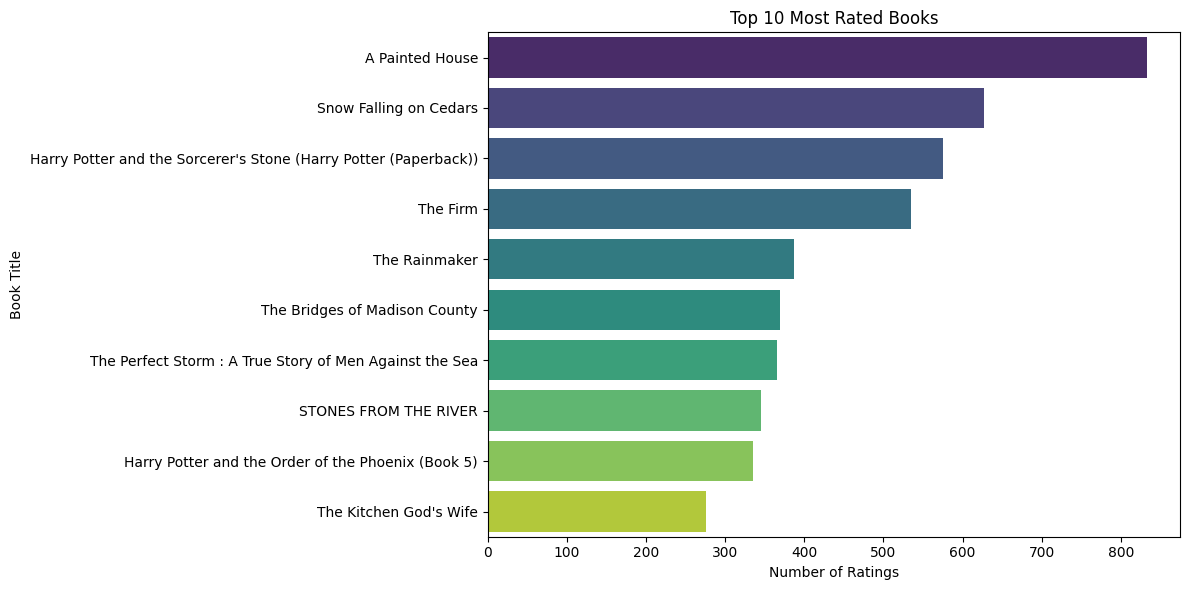

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 most rated books
top_rated = user_book_df.groupby('Book-Title').count()['Book-Rating'].sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated.values, y=top_rated.index, palette='viridis')
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()

C:\Users\Vaibhav Rathod\AppData\Local\Temp\ipykernel_4316\2527343771.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_avg_rated['avg_rating'], y=top_avg_rated.index, palette='coolwarm')


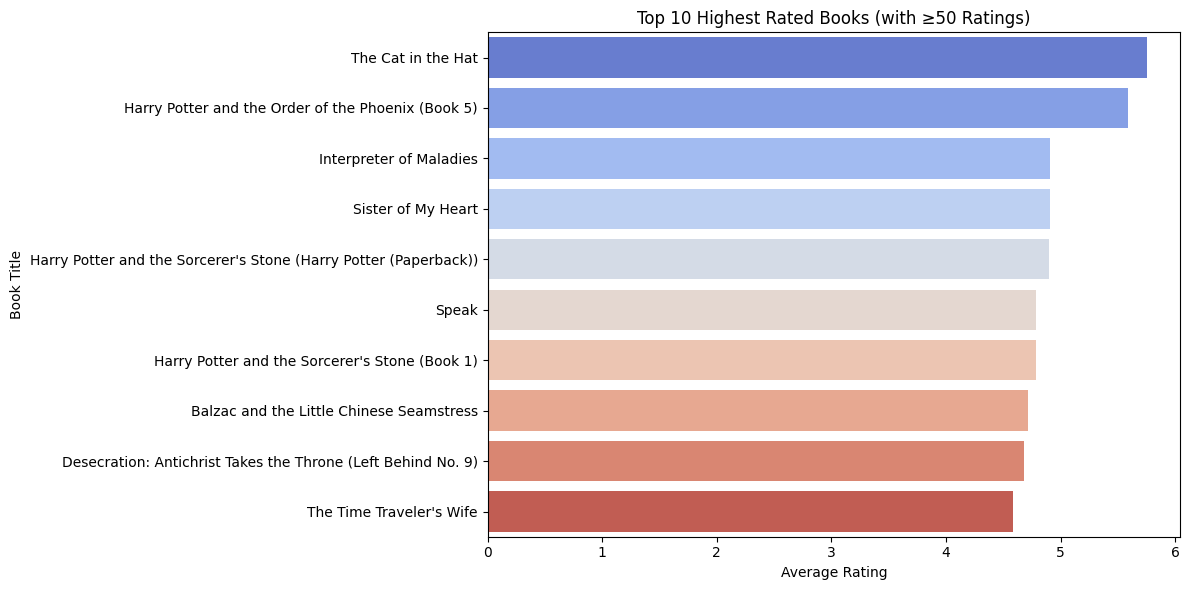

In [12]:
# Filter for books with at least 50 ratings
book_stats = user_book_df.groupby('Book-Title').agg({'Book-Rating': ['count', 'mean']})
book_stats.columns = ['num_ratings', 'avg_rating']
top_avg_rated = book_stats[book_stats['num_ratings'] >= 50].sort_values(by='avg_rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_avg_rated['avg_rating'], y=top_avg_rated.index, palette='coolwarm')
plt.title("Top 10 Highest Rated Books (with ≥50 Ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()

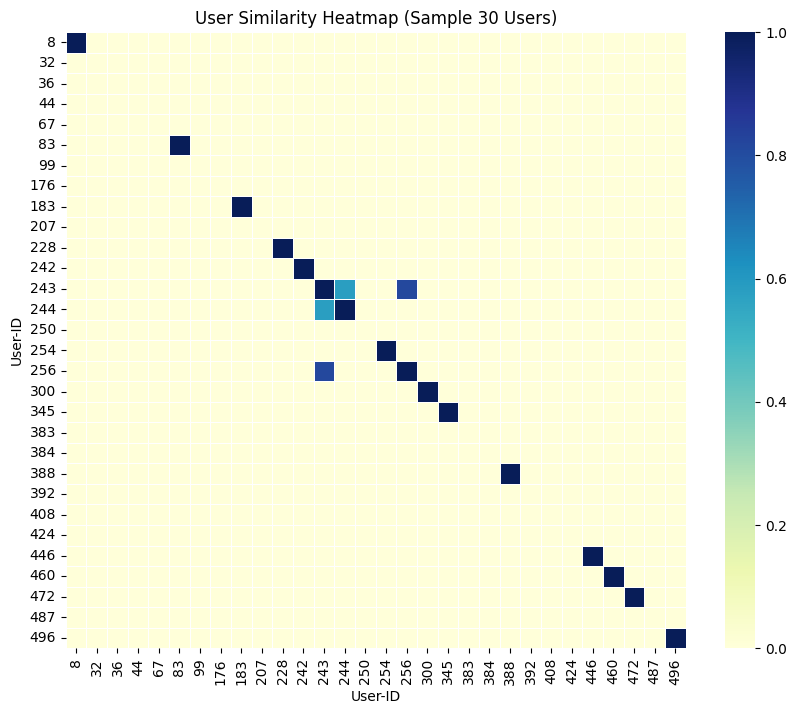

In [13]:
# Show similarity heatmap of a small sample of users
sample_users = user_similarity_df.iloc[:30, :30]

plt.figure(figsize=(10, 8))
sns.heatmap(sample_users, cmap="YlGnBu", linewidths=0.5)
plt.title("User Similarity Heatmap (Sample 30 Users)")
plt.show()

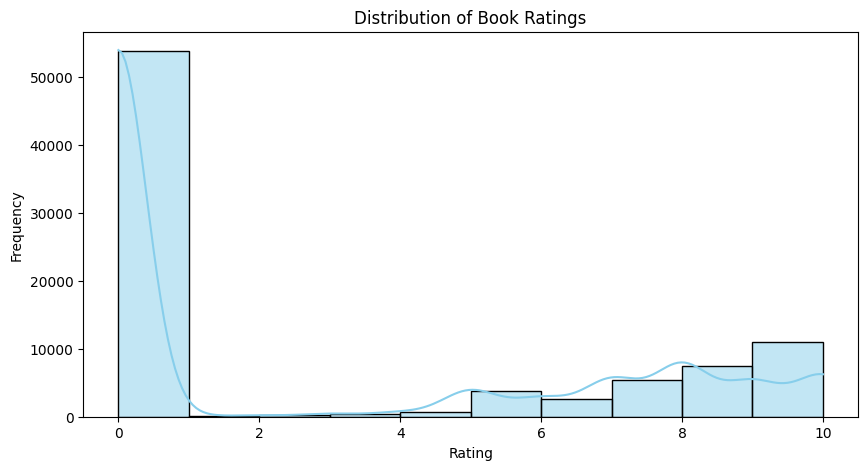

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(user_book_df['Book-Rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

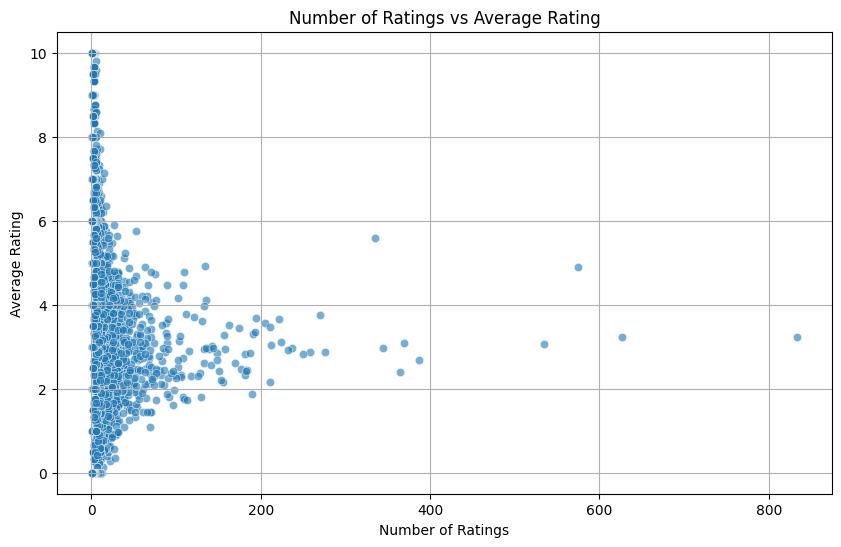

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=book_stats, x='num_ratings', y='avg_rating', alpha=0.6)
plt.title("Number of Ratings vs Average Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd

books = pd.read_excel(r'C:\Users\Vaibhav Rathod\Desktop\Nilay\Data Science Projet PS554\Books.xlsx')
ratings = pd.read_csv(r'C:\Users\Vaibhav Rathod\Desktop\Nilay\Data Science Projet PS554\Ratings.csv', encoding='ISO-8859-1')
users = pd.read_csv(r'C:\Users\Vaibhav Rathod\Desktop\Nilay\Data Science Projet PS554\Users.csv', encoding='ISO-8859-1')

In [8]:
book_ratings = pd.merge(ratings, books, on='ISBN')
user_book_df = pd.merge(book_ratings, users, on='User-ID')

Create the Item-User Matrix
This matrix will have:

Rows: Book Titles

Columns: User IDs

Values: Book Ratings

In [11]:
print(user_book_df.dtypes)

User-ID                  int64
ISBN                    object
Book-Rating              int64
Book-Title              object
Book-Author             object
Year-Of-Publication     object
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
Location                object
Age                    float64
dtype: object


In [12]:
import datetime

bad_titles = user_book_df['Book-Title'].apply(lambda x: isinstance(x, datetime.datetime))
print("Datetime titles:\n", user_book_df[bad_titles][['Book-Title']])

bad_ids = user_book_df['User-ID'].apply(lambda x: isinstance(x, datetime.datetime))
print("Datetime User-IDs:\n", user_book_df[bad_ids][['User-ID']])

Datetime titles:
                 Book-Title
29488  2003-01-02 00:00:00
50670  1914-08-01 00:00:00
60900  2003-01-02 00:00:00
63431  2003-01-02 00:00:00
72046  1914-08-01 00:00:00
84315  2003-01-02 00:00:00
Datetime User-IDs:
 Empty DataFrame
Columns: [User-ID]
Index: []


In [13]:
import datetime

user_book_df = user_book_df[~user_book_df['Book-Title'].apply(lambda x: isinstance(x, datetime.datetime))]

user_book_df['Book-Title'] = user_book_df['Book-Title'].astype(str)
user_book_df['User-ID'] = user_book_df['User-ID'].astype(str)

user_book_df['Book-Rating'] = pd.to_numeric(user_book_df['Book-Rating'], errors='coerce')
user_book_df.dropna(subset=['Book-Rating'], inplace=True)

In [15]:
popular_books = user_book_df['Book-Title'].value_counts()
popular_books = popular_books[popular_books >= 50].index
filtered_df = user_book_df[user_book_df['Book-Title'].isin(popular_books)]

active_users = filtered_df['User-ID'].value_counts()
active_users = active_users[active_users >= 30].index
filtered_df = filtered_df[filtered_df['User-ID'].isin(active_users)]

In [16]:
book_user_matrix = filtered_df.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
book_user_matrix.fillna(0, inplace=True)

In [17]:
book_user_matrix.shape

(190, 42)

In [18]:
book_user_matrix.head()

User-ID,102967,106225,113519,115120,11676,135149,13552,148744,153662,16795,...,36836,43246,52584,55492,60244,76352,78783,87141,95359,98741
Book-Title,,,,,,,,,,,,,,,,,,,,,
A Fine Balance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
A Painted House,0.0,9.0,0.0,0.0,9.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Patchwork Planet,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Tree Grows in Brooklyn,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Widow for One Year,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
book_user_matrix.index[:20]

Index(['A Fine Balance', 'A Painted House', 'A Patchwork Planet',
       'A Tree Grows in Brooklyn', 'A Widow for One Year',
       'AGE OF INNOCENCE (MOVIE TIE-IN)', 'Abduction',
       'Acts of War (Tom Clancy's Op Center (Paperback))', 'After the Fire',
       'Alive : The Story of the Andes Survivors (Avon Nonfiction)',
       'All I Really Need to Know', 'Angela's Ashes: A Memoir',
       'Angelas Ashes', 'Angle of Repose (Contemporary American Fiction)',
       'Anne of Green Gables (Anne of Green Gables Novels (Paperback))',
       'Apocalipstick', 'At Home in Mitford (The Mitford Years)',
       'Atonement : A Novel', 'Bag of Bones',
       'Balzac and the Little Chinese Seamstress'],
      dtype='object', name='Book-Title')

In [23]:
def recommend_books(book_name, n=5):
    if book_name not in book_similarity_df:
        return f"'{book_name}' not found in dataset."
    
    # Sort by similarity (excluding the book itself)
    similar_books = book_similarity_df[book_name].sort_values(ascending=False)[1:n+1]
    return similar_books

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

book_similarity = cosine_similarity(book_user_matrix)

book_similarity_df = pd.DataFrame(book_similarity, 
                                  index=book_user_matrix.index, 
                                  columns=book_user_matrix.index)

In [26]:
def recommend_books(book_name, n=5):
    if book_name not in book_similarity_df:
        return f"'{book_name}' not found in dataset."
    
    similar_books = book_similarity_df[book_name].sort_values(ascending=False)[1:n+1]
    return similar_books

In [27]:
recommend_books("A Fine Balance", 5)

Book-Title
Angle of Repose (Contemporary American Fiction)    1.000000
The Girls' Guide to Hunting and Fishing            0.707107
Speak                                              0.668965
The Crimson Petal and the White                    0.613572
Breathing Lessons                                  0.597948
Name: A Fine Balance, dtype: float64

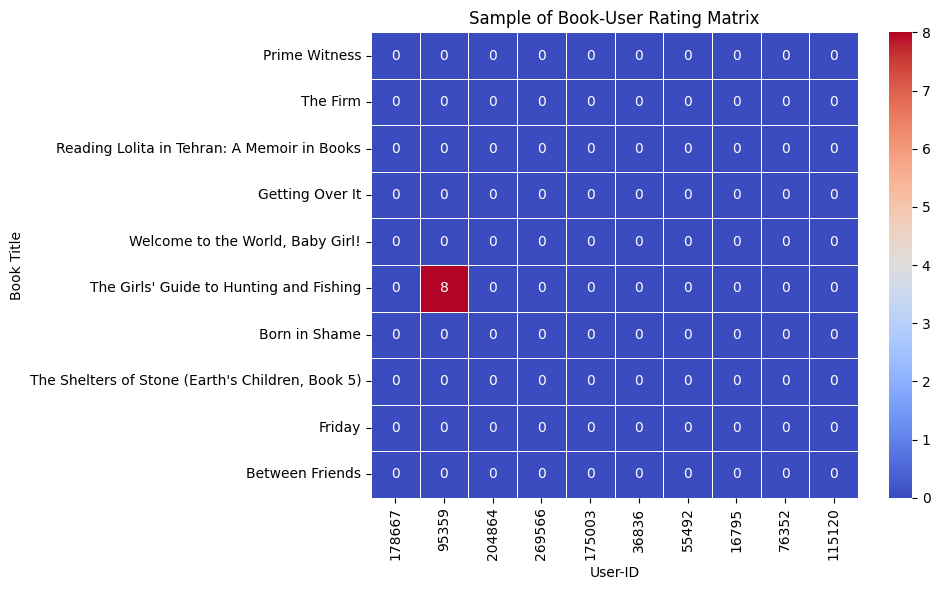

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample 10 books and 10 users for visualization
sample_matrix = book_user_matrix.sample(10, axis=0).sample(10, axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(sample_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Sample of Book-User Rating Matrix')
plt.xlabel('User-ID')
plt.ylabel('Book Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

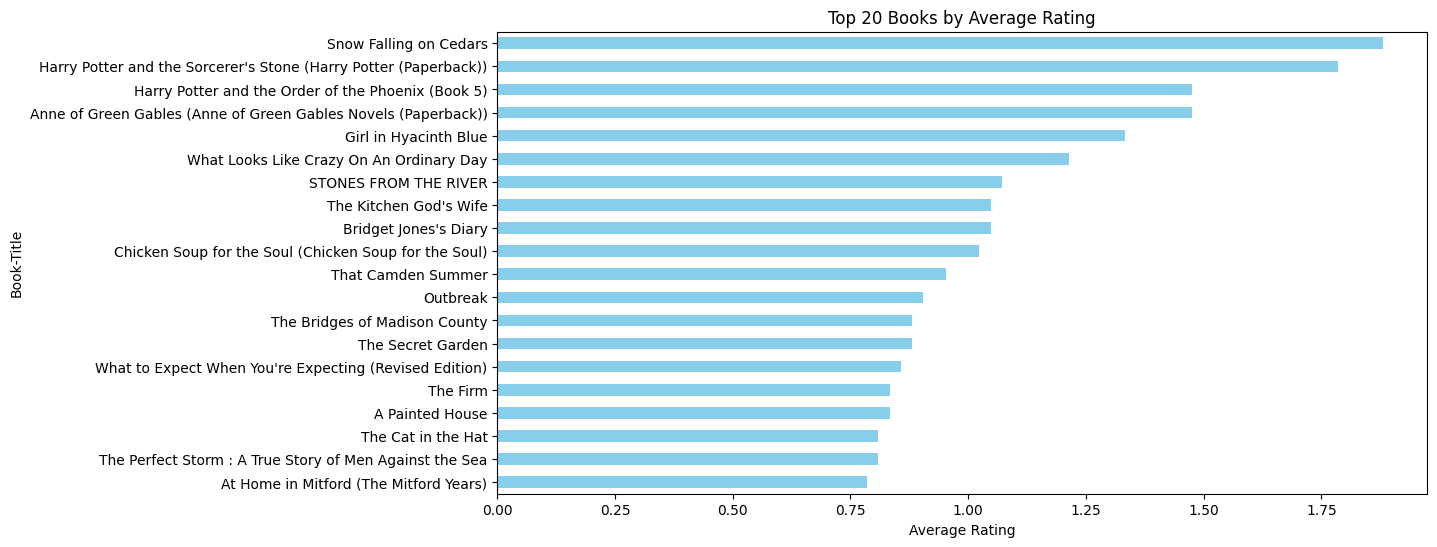

In [29]:
# Average rating per book
avg_ratings = book_user_matrix.mean(axis=1).sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
avg_ratings.plot(kind='barh', color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 20 Books by Average Rating')
plt.gca().invert_yaxis()
plt.show()

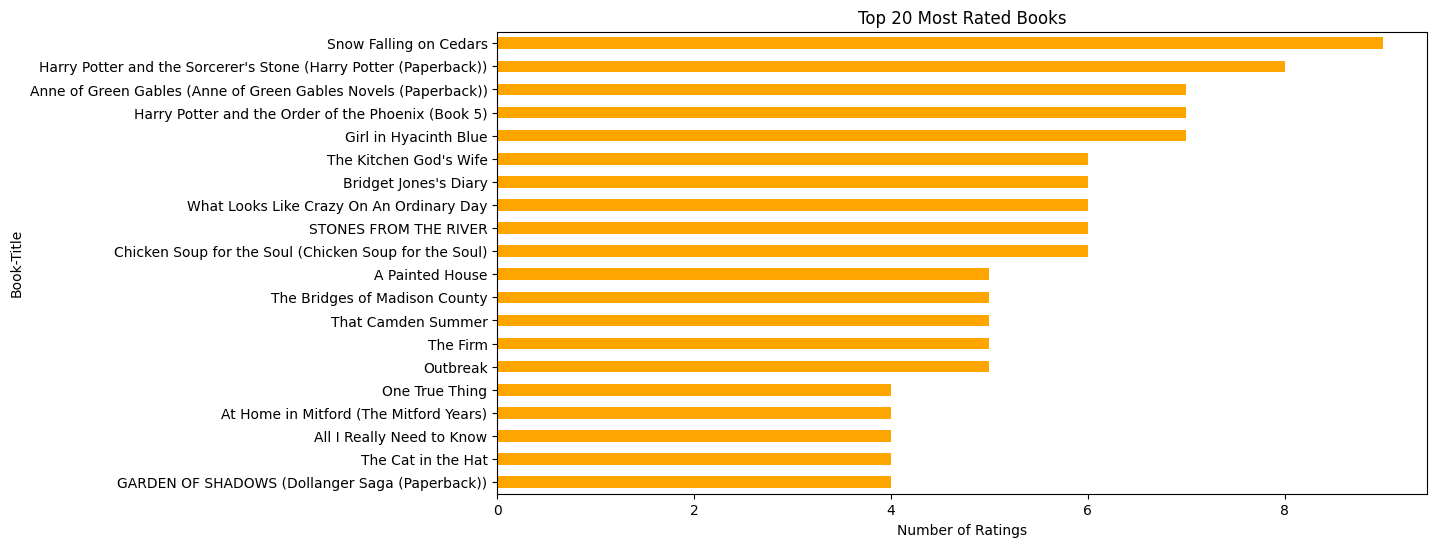

In [30]:
num_ratings = (book_user_matrix > 0).sum(axis=1).sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
num_ratings.plot(kind='barh', color='orange')
plt.xlabel('Number of Ratings')
plt.title('Top 20 Most Rated Books')
plt.gca().invert_yaxis()
plt.show()